### Convergent Recombination and J Gene Segments
Investigate the distribution of convergent recombination in embedding space created by the CVC.

In [1]:
cd ..

/home/ubuntu/CVC


#### Set Environment

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys
import collections
import pandas as pd
from matplotlib import pyplot as plt

SRC_DIR = "cvc"
assert os.path.isdir(SRC_DIR), f"Cannot find src dir: {SRC_DIR}"
sys.path.append(SRC_DIR)
MODEL_DIR = os.path.join(SRC_DIR, "models")
sys.path.append(MODEL_DIR)

FILT_EDIT_DIST = True

PLOT_DIR = os.path.join(os.path.dirname(SRC_DIR), "plots/CDR3_data_plots")
if not os.path.isdir(PLOT_DIR):
    os.makedirs(PLOT_DIR)
PLOT_DIR

/home/ubuntu/miniconda3/envs/cvc_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-12 06:26:21.820639: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 06:26:21.883989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 06:26:22.191425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with 

'plots/CDR3_data_plots'

#### Prepare data

In [4]:
data_dir = "./data/db_full_AA_nuc.csv"

In [5]:
# load data
tcrb_data = pd.read_csv(data_dir, engine="pyarrow")
tcrb_data

,aaSeqCDR3,nSeqCDR3,Organism,Locus
0,CASGTSNE,TGTGCCAGCGGCACCTCCAACGAG,human,TCRB
1,CAWKIQET,TGTGCCTGGAAAATCCAAGAGACC,human,TCRB
2,CASSS,TGTGCCAGCAGCTCG,human,TCRB
3,CASSETYE,TGTGCCAGCAGTGAAACCTACGAG,human,TCRB
4,CASTPNTE,TGTGCCAGCACCCCGAACACTGAA,human,TCRB


#### Calculate and Display Convergent Recombination

In [6]:
# for db data read above
tcrb_data_nseq = tcrb_data
# rename aaSeqCDR3 column Sequences
tcrb_data_nseq = tcrb_data_nseq.rename(columns={'aaSeqCDR3': 'Sequences'})

In [7]:
# extract sequences
tcrb_data_nseq_seq_only = tcrb_data_nseq[['Sequences', 'nSeqCDR3']]
tcrb_data_nseq_seq_only

,Sequences,nSeqCDR3
0,CASGTSNE,TGTGCCAGCGGCACCTCCAACGAG
1,CAWKIQET,TGTGCCTGGAAAATCCAAGAGACC
2,CASSS,TGTGCCAGCAGCTCG
3,CASSETYE,TGTGCCAGCAGTGAAACCTACGAG
4,CASTPNTE,TGTGCCAGCACCCCGAACACTGAA
...,...,...
203428632,CARGGGRGAGEQYF,TGTGCTAGGGGTGGGGGGCGGGGGGCGGGGGAGCAGTACTTC
203428633,CASSVGGGGWDEQYF,TGTGCCAGCAGCGTAGGAGGGGGGGGATGGGACGAGCAGTACTTC
203428634,CSAMKDPNQPQHF,TGCAGTGCTATGAAAGACCCCAATCAGCCCCAGCATTTT
203428635,CASSQGSLALYEQYF,TGTGCCAGCAGCCAGGGGTCCCTAGCGCTCTACGAGCAGTACTTC


In [8]:
tcrb_data_nseq_seq_only = tcrb_data_nseq_seq_only.drop_duplicates()
len(tcrb_data_nseq_seq_only)

162710892

In [11]:
# Count how many unique nSeqCDR3 are there per each Sequence group
df_counts = tcrb_data_nseq_seq_only.groupby('Sequences').count()
df_counts = df_counts.rename(columns={'nSeqCDR3': 'CR_num'})
collections.Counter(df_counts['CR_num'])

Counter({1: 75914867,
         3: 2738992,
         2: 7499624,
         5: 879331,
         4: 1430265,
         6: 595525,
         7: 428952,
         12: 136953,
         9: 250883,
         11: 164126,
         8: 321567,
         14: 97966,
         10: 200967,
         13: 114890,
         19: 49886,
         16: 73168,
         26: 24843,
         15: 84653,
         21: 40334,
         27: 22900,
         17: 63630,
         20: 44861,
         22: 36069,
         24: 30164,
         33: 14494,
         34: 13548,
         31: 16585,
         18: 56973,
         23: 32557,
         35: 12702,
         36: 11550,
         32: 15539,
         25: 27183,
         42: 8154,
         38: 10409,
         39: 9796,
         30: 18115,
         28: 21068,
         40: 9244,
         29: 19394,
         41: 8731,
         37: 11142,
         51: 5061,
         45: 6895,
         44: 7086,
         55: 4032,
         56: 3959,
         49: 5625,
         47: 6119,
         54: 4354,
   

In [10]:
# divide into bins
df_counts['CR_bin'] = pd.cut(df_counts.CR_num, bins=[0, 1, 50, 100, 200, 300, 400, 1000], labels=['0-1', '1-50','50-100', '100-200', '200-300', '300-400', '400+'])
df_counts.CR_bin.value_counts()

0-1        75914867
1-50       15698476
50-100       108423
100-200       30799
200-300        4574
300-400        1132
400+            427
Name: CR_bin, dtype: int64

#### Correlation between Convergent Recombination and J Genes

In [11]:
j_gene_data = pd.read_csv('data/db_all_labeled_j_gene.csv', engine="pyarrow")
j_gene_data

,Sequences,Organism,Locus,SampleName,jGeneName,Private_Public_label
0,CASGTSNE,human,TCRB,D29_100.tsv,TCRBJ02-07,1
1,CAWKIQET,human,TCRB,D29_100.tsv,TCRBJ02-05,0
2,CASSS,human,TCRB,D29_100.tsv,TCRBJ02-03,1
3,CASSETYE,human,TCRB,D29_100.tsv,TCRBJ02-07,1
4,CASTPNTE,human,TCRB,D29_100.tsv,TCRBJ01-01,1
...,...,...,...,...,...,...
90813282,CAGSTGEPTEAFF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-01,0
90813283,CAGSPQNYGYTF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-02,0
90813284,CASSRSVSYNSPLPF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-06,0
90813285,CARGGGRGAGEQYF,human,TCRB,IMF-BC_9A.tsv,TCRBJ02-07,0


In [12]:
# make the index of df_counts a column
df_counts.index.name = 'Sequences'
df_counts.reset_index(inplace=True)
df_counts.head()

,Sequences,CR_num,CR_bin
0,,1,0-1
1,A,3,1-50
2,AAAEGTREQYF,1,0-1
3,AAAFF,1,0-1
4,AAAFYQETQYF,1,0-1


In [13]:
# Merge dataframes - add CR number/bin for each sequence
j_gene_CR_data = pd.merge(j_gene_data, df_counts, on='Sequences')
j_gene_CR_data

,Sequences,Organism,Locus,SampleName,jGeneName,Private_Public_label,CR_num,CR_bin
0,CASGTSNE,human,TCRB,D29_100.tsv,TCRBJ02-07,1,1,0-1
1,CAWKIQET,human,TCRB,D29_100.tsv,TCRBJ02-05,0,1,0-1
2,CASSS,human,TCRB,D29_100.tsv,TCRBJ02-03,1,14,1-50
3,CASSETYE,human,TCRB,D29_100.tsv,TCRBJ02-07,1,3,1-50
4,CASTPNTE,human,TCRB,D29_100.tsv,TCRBJ01-01,1,2,1-50
...,...,...,...,...,...,...,...,...
90813282,CAGSTGEPTEAFF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-01,0,1,0-1
90813283,CAGSPQNYGYTF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-02,0,1,0-1
90813284,CASSRSVSYNSPLPF,human,TCRB,IMF-BC_9A.tsv,TCRBJ01-06,0,1,0-1
90813285,CARGGGRGAGEQYF,human,TCRB,IMF-BC_9A.tsv,TCRBJ02-07,0,1,0-1


In [14]:
# Create a pivot table to count occurrences of CR groups within each J gene
pivot_table = j_gene_CR_data.pivot_table(index='jGeneName', columns='CR_bin', aggfunc='size', fill_value=0)

# Calculate the percentage of each CR group within each J gene
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

pivot_table_percentage.reset_index()

CR_bin,jGeneName,0-1,1-50,50-100,100-200,200-300,300-400,400+
0,TCRBJ01-01,81.384875,18.412232,0.148997,0.043969,0.007303,0.001786,0.000838
1,TCRBJ01-02,83.324677,16.534221,0.107389,0.028997,0.003940,0.000671,0.000105
2,TCRBJ01-03,81.863692,17.976723,0.122647,0.031982,0.003980,0.000868,0.000109
3,TCRBJ01-04,82.231253,17.632828,0.106111,0.026101,0.003263,0.000346,0.000099
4,TCRBJ01-05,81.649529,18.159177,0.142297,0.040718,0.005800,0.001900,0.000578
5,TCRBJ01-06,82.721075,17.190540,0.073166,0.014242,0.000882,0.000063,0.000032
6,TCRBJ02-01,83.811958,16.060528,0.096201,0.026368,0.003752,0.000888,0.000306
7,TCRBJ02-02,81.790623,18.061464,0.114635,0.029683,0.003125,0.000437,0.000034
8,TCRBJ02-03,82.281053,17.545244,0.128424,0.037269,0.005949,0.001551,0.000510
9,TCRBJ02-04,87.541059,12.430794,0.024662,0.003433,0.000053,0.000000,0.000000


##### Plotting

In [ ]:
# Function to plot percentage of CR bins by J gene
def plot_cr_bins(pivot_table_percentage, cr_bins, title_suffix, file_name_suffix, color_map):
    # Filter the DataFrame to include only the desired CR groups
    selected_groups = pivot_table_percentage[cr_bins]

    # sort x axis by CR group percentage
    ax = selected_groups.sort_values(by=cr_bins[-1], ascending=False).plot(
        kind='bar', stacked=True, figsize=(10, 6), cmap=color_map)

    # Title and labels
    plt.title(f'Percentage of CR Bins {title_suffix} by J Gene')
    plt.xlabel('J Gene Name')
    plt.ylabel('Percentage')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add legend
    plt.legend(title='CR Bin', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save plot
    fig_path = os.path.join('plots/benchmarking', f'CR_j_gene_{file_name_suffix}.svg')
    plt.savefig(fig_path, bbox_inches='tight', dpi=1200)

    # Show plot
    plt.tight_layout()
    plt.show()

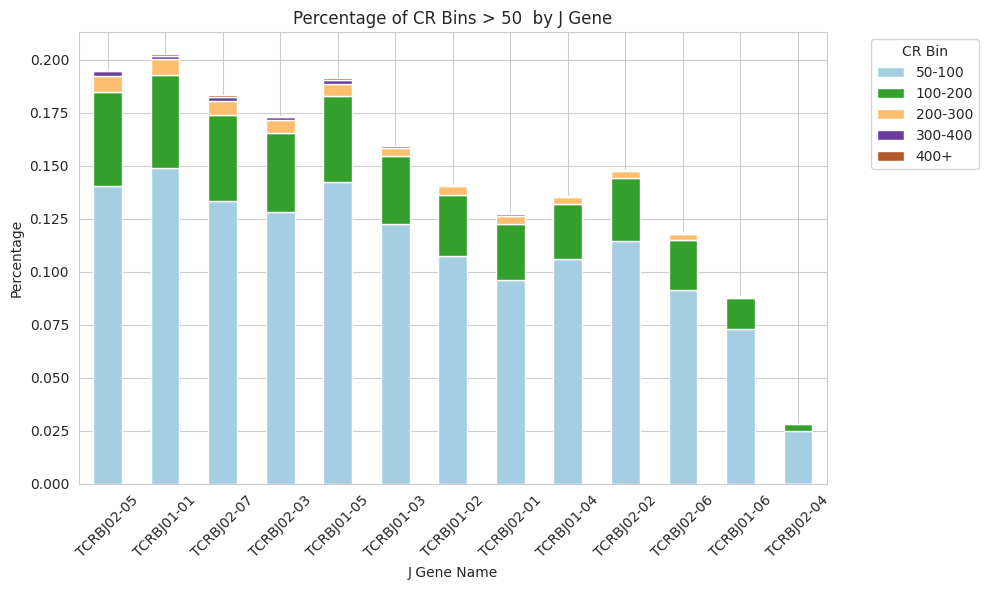

In [51]:
# plot CR bins > 50
plot_cr_bins(pivot_table_percentage, ['50-100', '100-200', '200-300', '300-400', '400+'], "> 50", "50_plus", 'Paired')

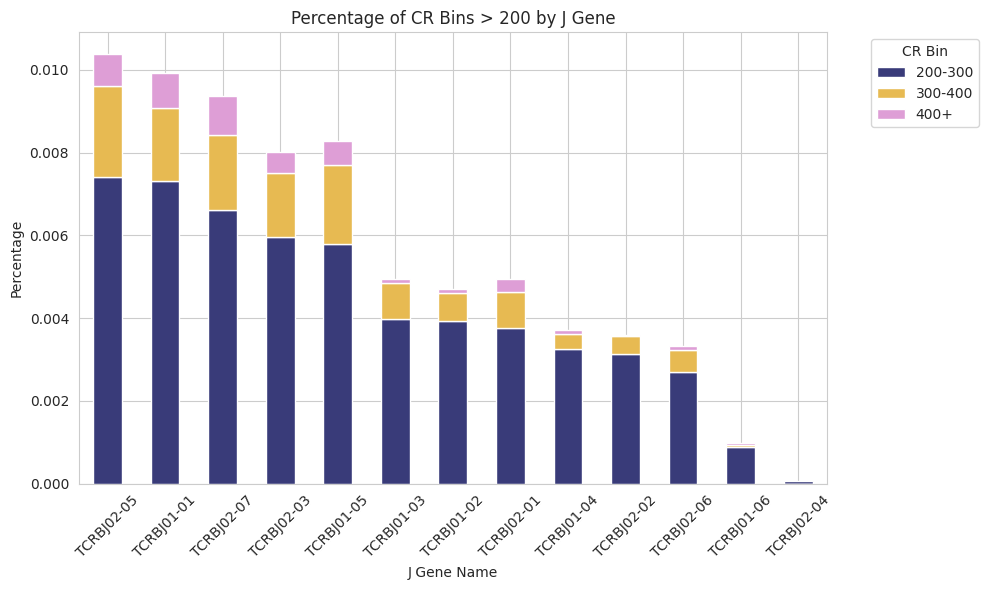

In [52]:
# plot CR bins > 200
plot_cr_bins(pivot_table_percentage, ['200-300', '300-400', '400+'], "> 200", "200_plus", 'tab20b')